In [26]:
import os
import keras
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

The dataset consists of subset of handwritten characters from Kannada/Telugu script. Each character is seen as sequence of 2-dimensional points (x and y coordinates) of one stroke of character (pen down to pen up). </br>
Each data file is considered as one sample. Each file includes an array of elements. The numbers in each file are read as follows: </br>
1.  First element indicates the number of 2-d sequential points in that file.
2.  Second element onwards correspond to the 2-d sequential data points. They are considered in pairs as follows: first 2 numbers (i.e., 2nd and 3rd elements) are corresponding to first sequential point, next 2 numbers (i.e., 4th and 5th elements) are corresponding to second sequential point and so on. 

In [27]:
classes = ["a", "ai", "bA", "chA", "tA"]

def getHandritingData(folder):
	data = []

	for k in range(5):
		for i in os.listdir(f"./{classes[k]}/{folder}"):

			with open(f"./{classes[k]}/{folder}/{i}") as f:
				coords = np.array([float(x) for x in f.readline().rstrip().split()])

				coordnums = int(coords[0])
				xcoords = coords[1::2]
				ycoords = coords[2::2]

				rangex = max(xcoords) - min(xcoords)
				xcoords = (xcoords - min(xcoords))/rangex		#min-max normalisation

				rangey = max(ycoords) - min(ycoords)
				ycoords = (ycoords - min(ycoords))/rangey

				label = [0, 0, 0, 0, 0]
				label[k] = 1

				letter = [label, coordnums, xcoords, ycoords]
				data.append(letter)
	
	random.shuffle(data)
	return data

In [28]:
train = getHandritingData("train")
test = getHandritingData("dev")

In [29]:
def split(data):
	xdata = []
	ydata = []
	for i in range(len(data)):
		xdata.append(data[i][1:])
		ydata.append(data[i][0])

	return xdata, ydata

In [30]:
xtrain, ytrain = split(train)
xtest, ytest = split(test)

In [31]:
def drawletter(letter):
	plt.figure(figsize=(3,1))
	plt.plot(letter[1], letter[2], color="black", linewidth=5)
	plt.axis("off")
	plt.show()

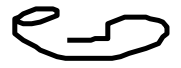

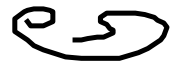

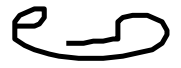

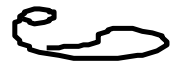

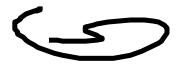

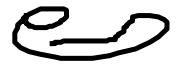

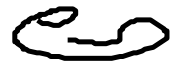

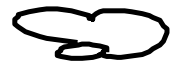

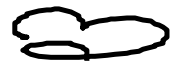

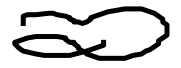

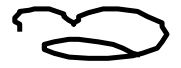

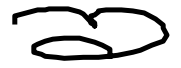

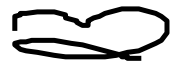

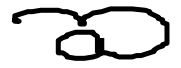

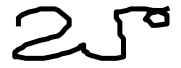

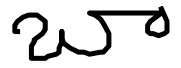

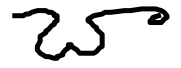

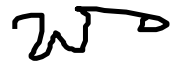

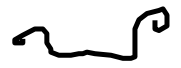

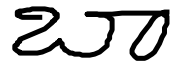

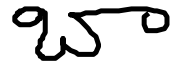

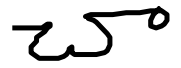

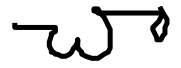

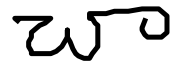

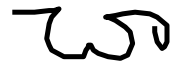

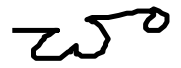

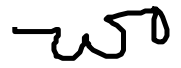

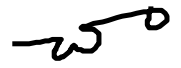

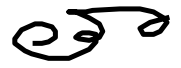

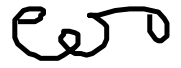

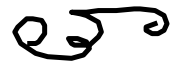

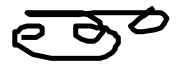

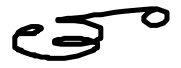

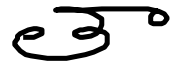

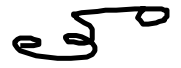

In [32]:
# visualising the characters by joining the coordinates

for i in range(5):
	num = 0

	for n in range(len(ytrain)):
		if num == 7:
			break
		if ytrain[n][i] == 1:
			drawletter(xtrain[n])
			num+=1


In [33]:
def TensorConversion(x, y):
	xout = []
	lens = []

	for x_ in x:
		lens.append(x_[0])
		char = np.array([x_[1], x_[2]]).T
		xout.extend(tf.constant(char))
	
	xout = tf.RaggedTensor.from_row_lengths(xout, row_lengths=lens)
	yout = tf.constant(y)

	return xout, yout

In [34]:
xtrain, ytrain = TensorConversion(xtrain, ytrain)
xtest, ytest = TensorConversion(xtest, ytest)

Epoch 1/1000
11/11 - 3s - loss: 1.5057 - accuracy: 0.3565 - 3s/epoch - 262ms/step
Epoch 2/1000
11/11 - 1s - loss: 1.2148 - accuracy: 0.4870 - 710ms/epoch - 65ms/step
Epoch 3/1000
11/11 - 1s - loss: 0.9935 - accuracy: 0.5797 - 739ms/epoch - 67ms/step
Epoch 4/1000
11/11 - 1s - loss: 0.8820 - accuracy: 0.6029 - 683ms/epoch - 62ms/step
Epoch 5/1000
11/11 - 1s - loss: 0.8068 - accuracy: 0.6783 - 706ms/epoch - 64ms/step
Epoch 6/1000
11/11 - 1s - loss: 0.7938 - accuracy: 0.6319 - 692ms/epoch - 63ms/step
Epoch 7/1000
11/11 - 1s - loss: 0.9646 - accuracy: 0.5594 - 768ms/epoch - 70ms/step
Epoch 8/1000
11/11 - 1s - loss: 0.8302 - accuracy: 0.5855 - 711ms/epoch - 65ms/step
Epoch 9/1000
11/11 - 1s - loss: 0.7823 - accuracy: 0.5971 - 772ms/epoch - 70ms/step
Epoch 10/1000
11/11 - 1s - loss: 0.7508 - accuracy: 0.6319 - 717ms/epoch - 65ms/step
Epoch 11/1000
11/11 - 1s - loss: 0.7191 - accuracy: 0.6609 - 742ms/epoch - 67ms/step
Epoch 12/1000
11/11 - 1s - loss: 0.6979 - accuracy: 0.6638 - 715ms/epoch - 6

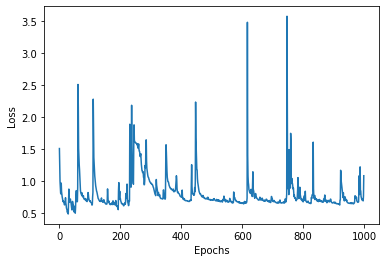

11/11 [==============================] - 1s 26ms/step
Train Accuracy: 0.37971014492753624
Confusion Matrix
[[69  0  0  0  0]
 [ 7 63  0  0  0]
 [67  0  0  0  0]
 [70  0  0  0  0]
 [69  0  0  0  0]]
4/4 [==============================] - 0s 16ms/step

Test Accuracy: 0.4
Confusion Matrix
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]]


In [35]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(128, return_sequences=True, batch_input_shape=(None, None, 2)))
model.add(keras.layers.SimpleRNN(32, return_sequences=False))
model.add(keras.layers.Dense(5, activation='softmax', name="OutputLayer"))


model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, verbose=2, epochs=1000)


plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

trainpred = model.predict(xtrain)
trainpred = np.rint(trainpred)
print("Train Accuracy:", accuracy_score(ytrain, trainpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytrain, axis=1), tf.argmax(trainpred, axis=1)))

testpred = model.predict(xtest)
testpred = np.rint(testpred)
print("\nTest Accuracy:", accuracy_score(ytest, testpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(testpred, axis=1)))

Epoch 1/300
11/11 - 6s - loss: 1.5571 - accuracy: 0.2000 - 6s/epoch - 501ms/step
Epoch 2/300
11/11 - 2s - loss: 1.4247 - accuracy: 0.3913 - 2s/epoch - 191ms/step
Epoch 3/300
11/11 - 2s - loss: 1.2319 - accuracy: 0.4609 - 2s/epoch - 192ms/step
Epoch 4/300
11/11 - 2s - loss: 1.0576 - accuracy: 0.5942 - 2s/epoch - 181ms/step
Epoch 5/300
11/11 - 2s - loss: 0.8649 - accuracy: 0.6551 - 2s/epoch - 185ms/step
Epoch 6/300
11/11 - 2s - loss: 0.8256 - accuracy: 0.6754 - 2s/epoch - 205ms/step
Epoch 7/300
11/11 - 2s - loss: 0.8080 - accuracy: 0.6493 - 2s/epoch - 204ms/step
Epoch 8/300
11/11 - 2s - loss: 0.6905 - accuracy: 0.7130 - 2s/epoch - 203ms/step
Epoch 9/300
11/11 - 2s - loss: 0.5809 - accuracy: 0.7681 - 2s/epoch - 191ms/step
Epoch 10/300
11/11 - 2s - loss: 0.5299 - accuracy: 0.7768 - 2s/epoch - 198ms/step
Epoch 11/300
11/11 - 2s - loss: 0.5336 - accuracy: 0.7681 - 2s/epoch - 194ms/step
Epoch 12/300
11/11 - 2s - loss: 0.8822 - accuracy: 0.6261 - 2s/epoch - 203ms/step
Epoch 13/300
11/11 - 2s -

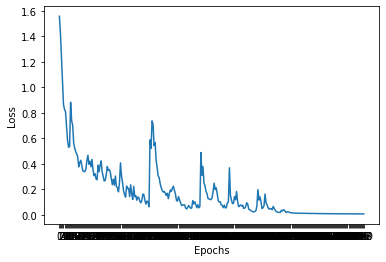

11/11 [==============================] - 1s 57ms/step
Train Accuracy: 0.9971014492753624
Confusion Matrix
[[69  0  0  0  0]
 [ 0 70  0  0  0]
 [ 0  0 67  0  0]
 [ 0  0  0 70  0]
 [ 0  0  0  1 68]]
4/4 [==============================] - 0s 45ms/step

Test Accuracy: 0.98
Confusion Matrix
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  2 18  0]
 [ 0  0  0  0 20]]


In [36]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, return_sequences=True, batch_input_shape=(None, None, 2)))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(5, activation='softmax', name="OutputLayer"))


#es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1E-4, verbose=2, patience=2)
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, verbose=2, epochs=300)


plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(history.history["loss"])))
plt.show()

trainpred = model.predict(xtrain)
trainpred = np.rint(trainpred)
print("Train Accuracy:", accuracy_score(ytrain, trainpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytrain, axis=1), tf.argmax(trainpred, axis=1)))

testpred = model.predict(xtest)
testpred = np.rint(testpred)
print("\nTest Accuracy:", accuracy_score(ytest, testpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(testpred, axis=1)))

In RNN, even after 1000 epochs, the loss is not converging though there are several local minimas but even the minimum cross-entropy loss is not falling below 0.5, whereas in LSTM, the loss has converged after around 200 epochs. The training loss is 0.006 and it is giving 98% accuracy on test data. It is clear that LSTM is performing much better than RNN in this case. </br>
* This big difference might be due to the reason that for the classification of these characters, it is necessary for the model to learn long dependencies, since then only it will be able to learn the character. The length of data samples in this case is variable, where the maximum length is around 250. Since RNN cannot learn long term dependencies, it is unable to learn the perform the task of recognizing the character.
* The computation time of RNN is much less than LSTM (since LSTM is more complex than RNN). RNN model took just 4 minutes for 300 epochs while LSTM model took 11 minutes for computation. So, for cases where the model does not need to learn long term dependencies, RNN will prove to be a better choice.